In [ ]:
# !pip install pandas seaborn statsmodels sklearn openpyxl xlrd geopandas pysal ppscore

In [1180]:
# General
import pandas as pd
import os
import scripts
import importlib
import numpy as np
import warnings

# Machine Learnign
## Sklearns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Statmodels
from statsmodels.tools import add_constant
import statsmodels.api as sm

## Others
import ppscore as pps
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

# Geo
import geopandas as gpd
import libpysal
import splot
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from pysal.model import spreg

In [1271]:
importlib.reload(scripts)

<module 'scripts' from '/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/scripts.py'>

In [1275]:
sns.set_theme()

In [1281]:
import json

variables = json.load(open('variables.json', 'r'))

variables_sel = variables['est_jan']

### Carregar Dados

In [1188]:
df_jan = pd.read_csv('dataset/novo/UF_mercado_imobiliario_jan vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_jan.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_compra_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_01
CD_UF,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,1457.0,240000.0,2.313967e+08,8.041858,61.24,3055149,0.000477,0.078556,75.739903,8728.0
52,GO,Goiás,20.907243,0.735,810.97,8081.0,180000.0,3.114260e+08,7.754394,82.62,7113540,0.001136,0.025304,43.779325,17600.0
51,MT,Mato Grosso,3.904110,0.725,762.52,9696.0,175000.0,1.565940e+08,7.755467,70.00,3526220,0.002750,0.049628,44.408469,8882.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,1854.0,165000.0,1.222186e+08,7.601646,68.32,2809394,0.000660,0.058732,43.503548,6765.0
25,PB,Paraíba,71.533102,0.658,474.94,-2527.0,158540.5,9.884272e+07,7.413085,61.00,4039277,-0.000626,0.039250,24.470400,6561.0


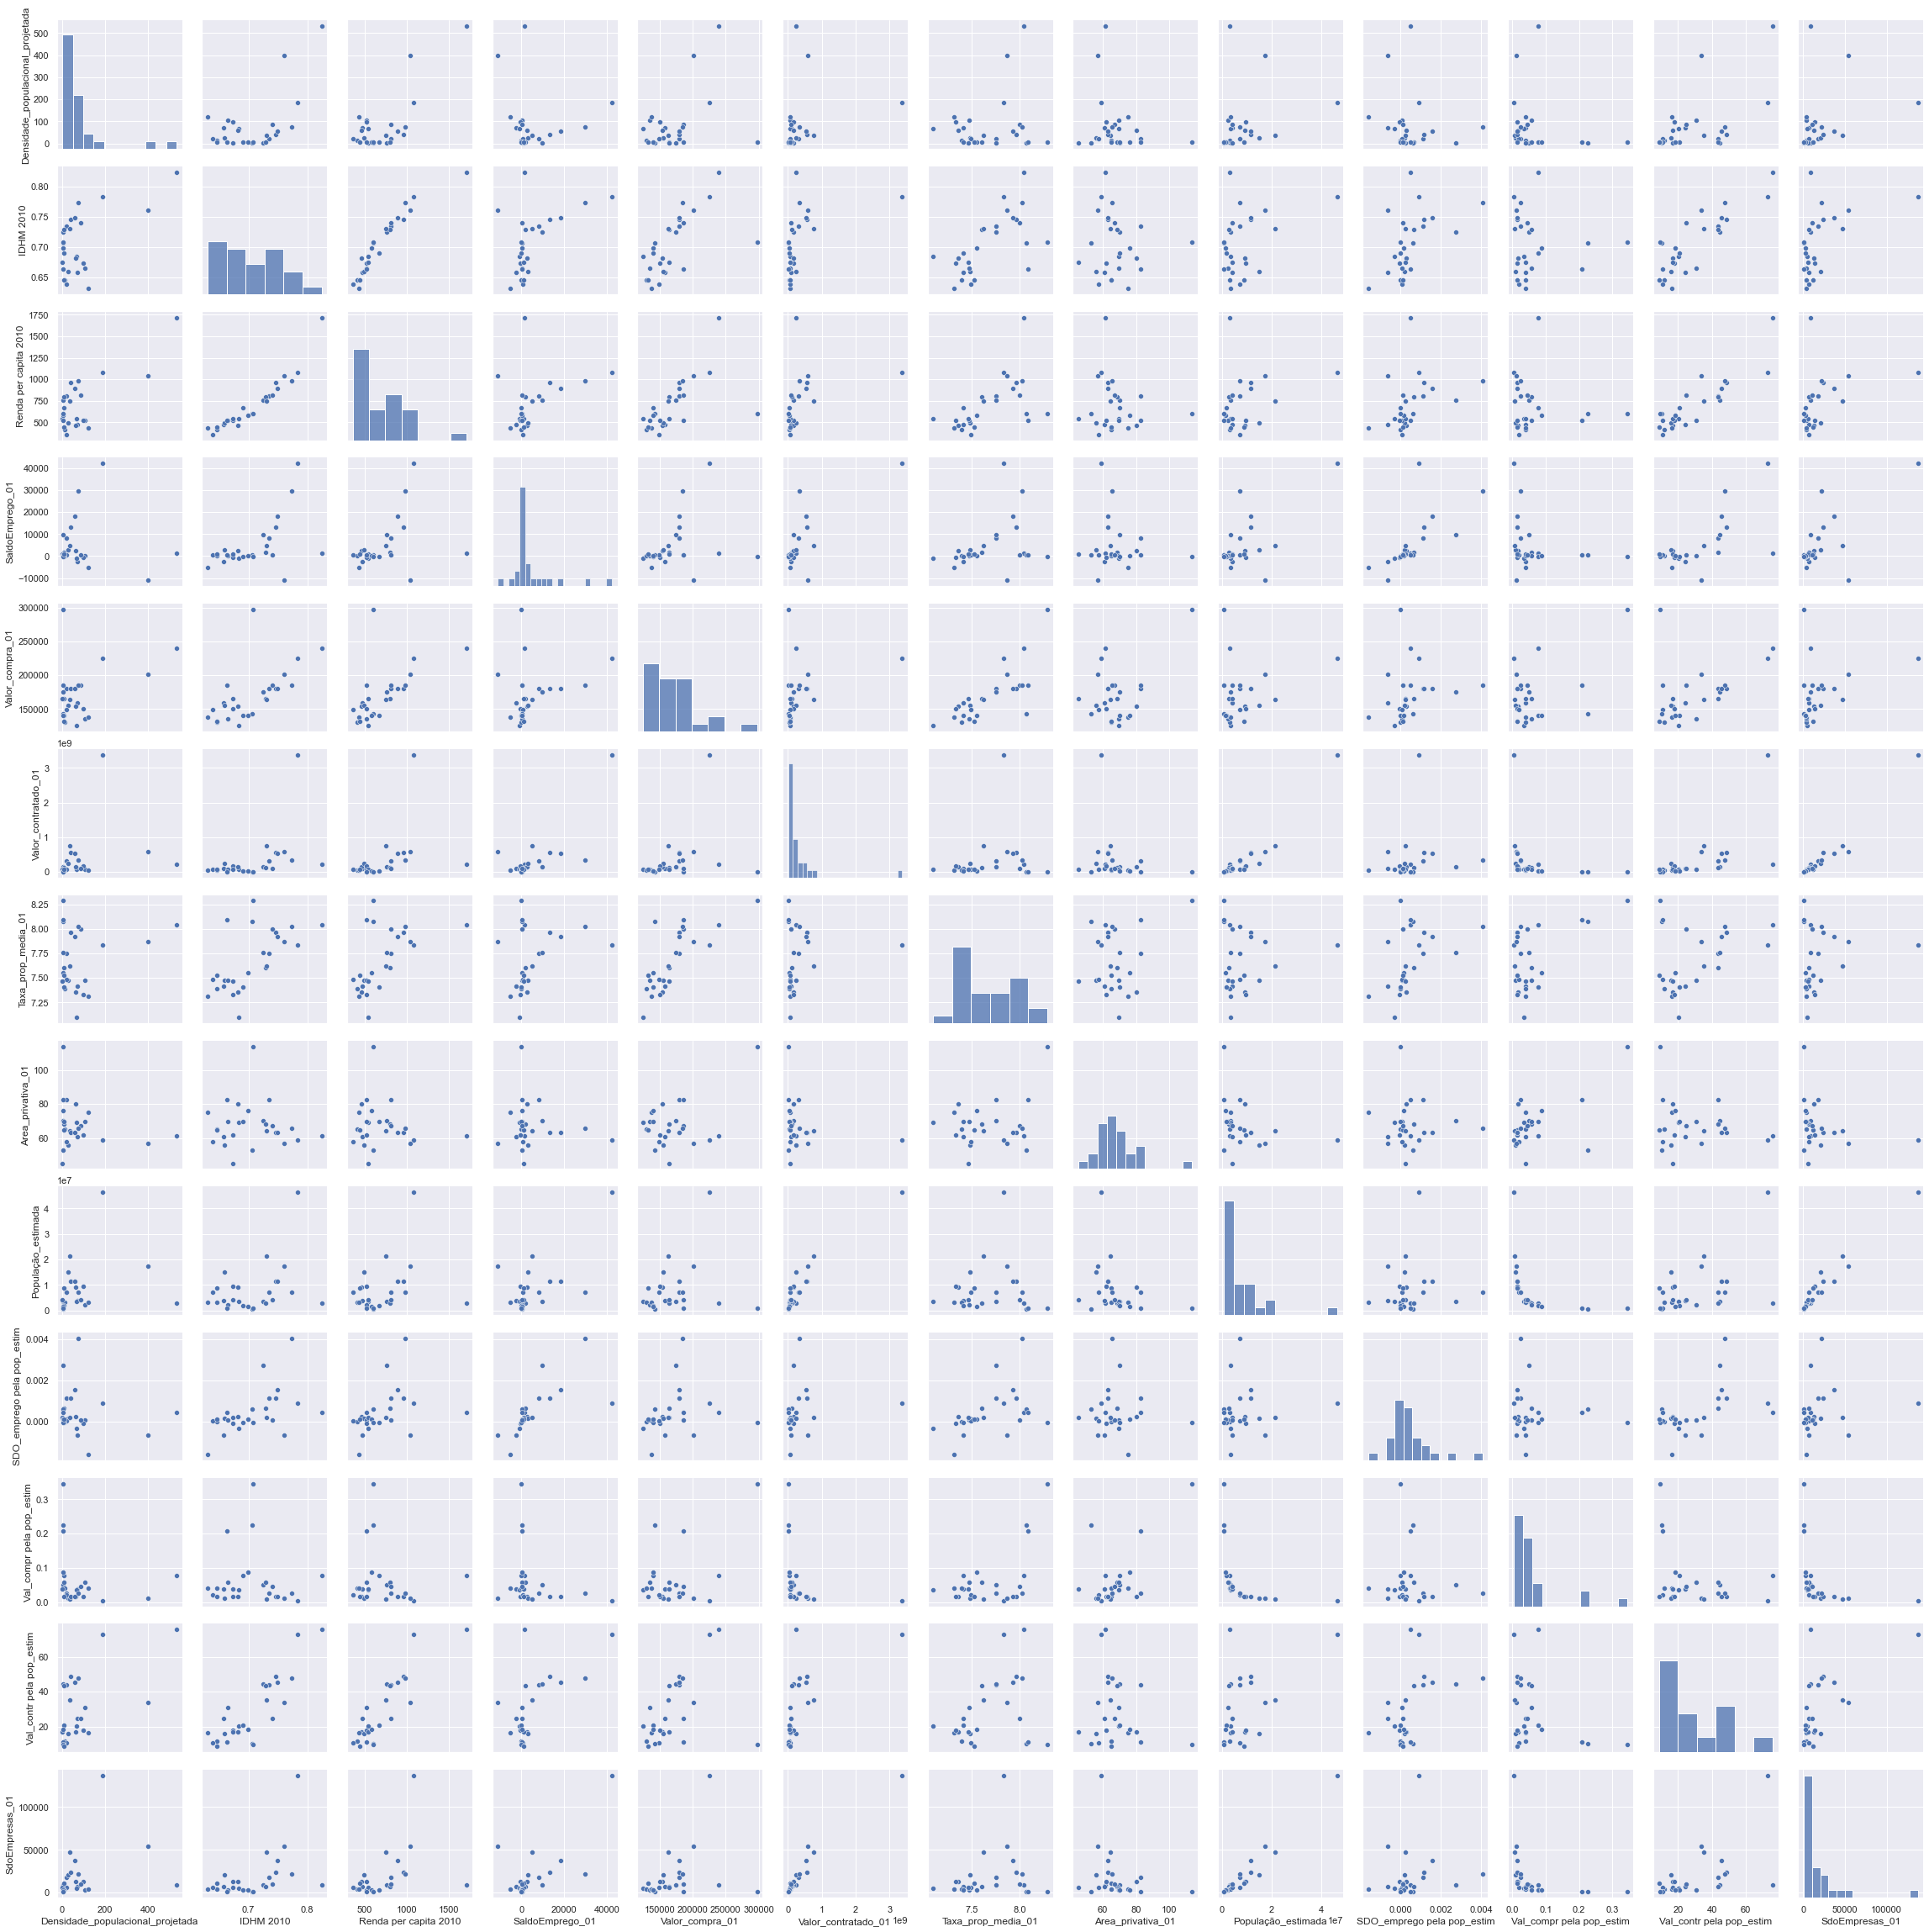

In [1276]:
sns.pairplot(df_jan.iloc[:,2:])

plt.show()

In [1190]:
df_dez = pd.read_csv('dataset/novo/UF_mercado_imobiliario_dez vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_dez.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_12,casosAcumulado_12,Valor_compra_12,Valor_contratado_12,Taxa_prop_media_12,Area_privativa_12,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_12
CD_UF,,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,-1023.0,251701,239597.96,6.314860e+08,7.639863,59.85,3055149,-0.000335,0.078424,206.695655,38649.0
52,GO,Goiás,20.907243,0.735,810.97,-1208.0,308868,150000.00,6.799661e+08,7.355904,76.12,7113540,-0.000170,0.021087,95.587583,77671.0
51,MT,Mato Grosso,3.904110,0.725,762.52,-4203.0,179427,190000.00,3.166171e+08,7.411909,69.22,3526220,-0.001192,0.053882,89.789373,39731.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,-2466.0,133761,160000.00,2.459794e+08,7.545629,60.54,2809394,-0.000878,0.056952,87.556024,30206.0
25,PB,Paraíba,71.533102,0.658,474.94,1185.0,166484,130000.00,2.010239e+08,6.682909,52.65,4039277,0.000293,0.032184,49.767302,27561.0


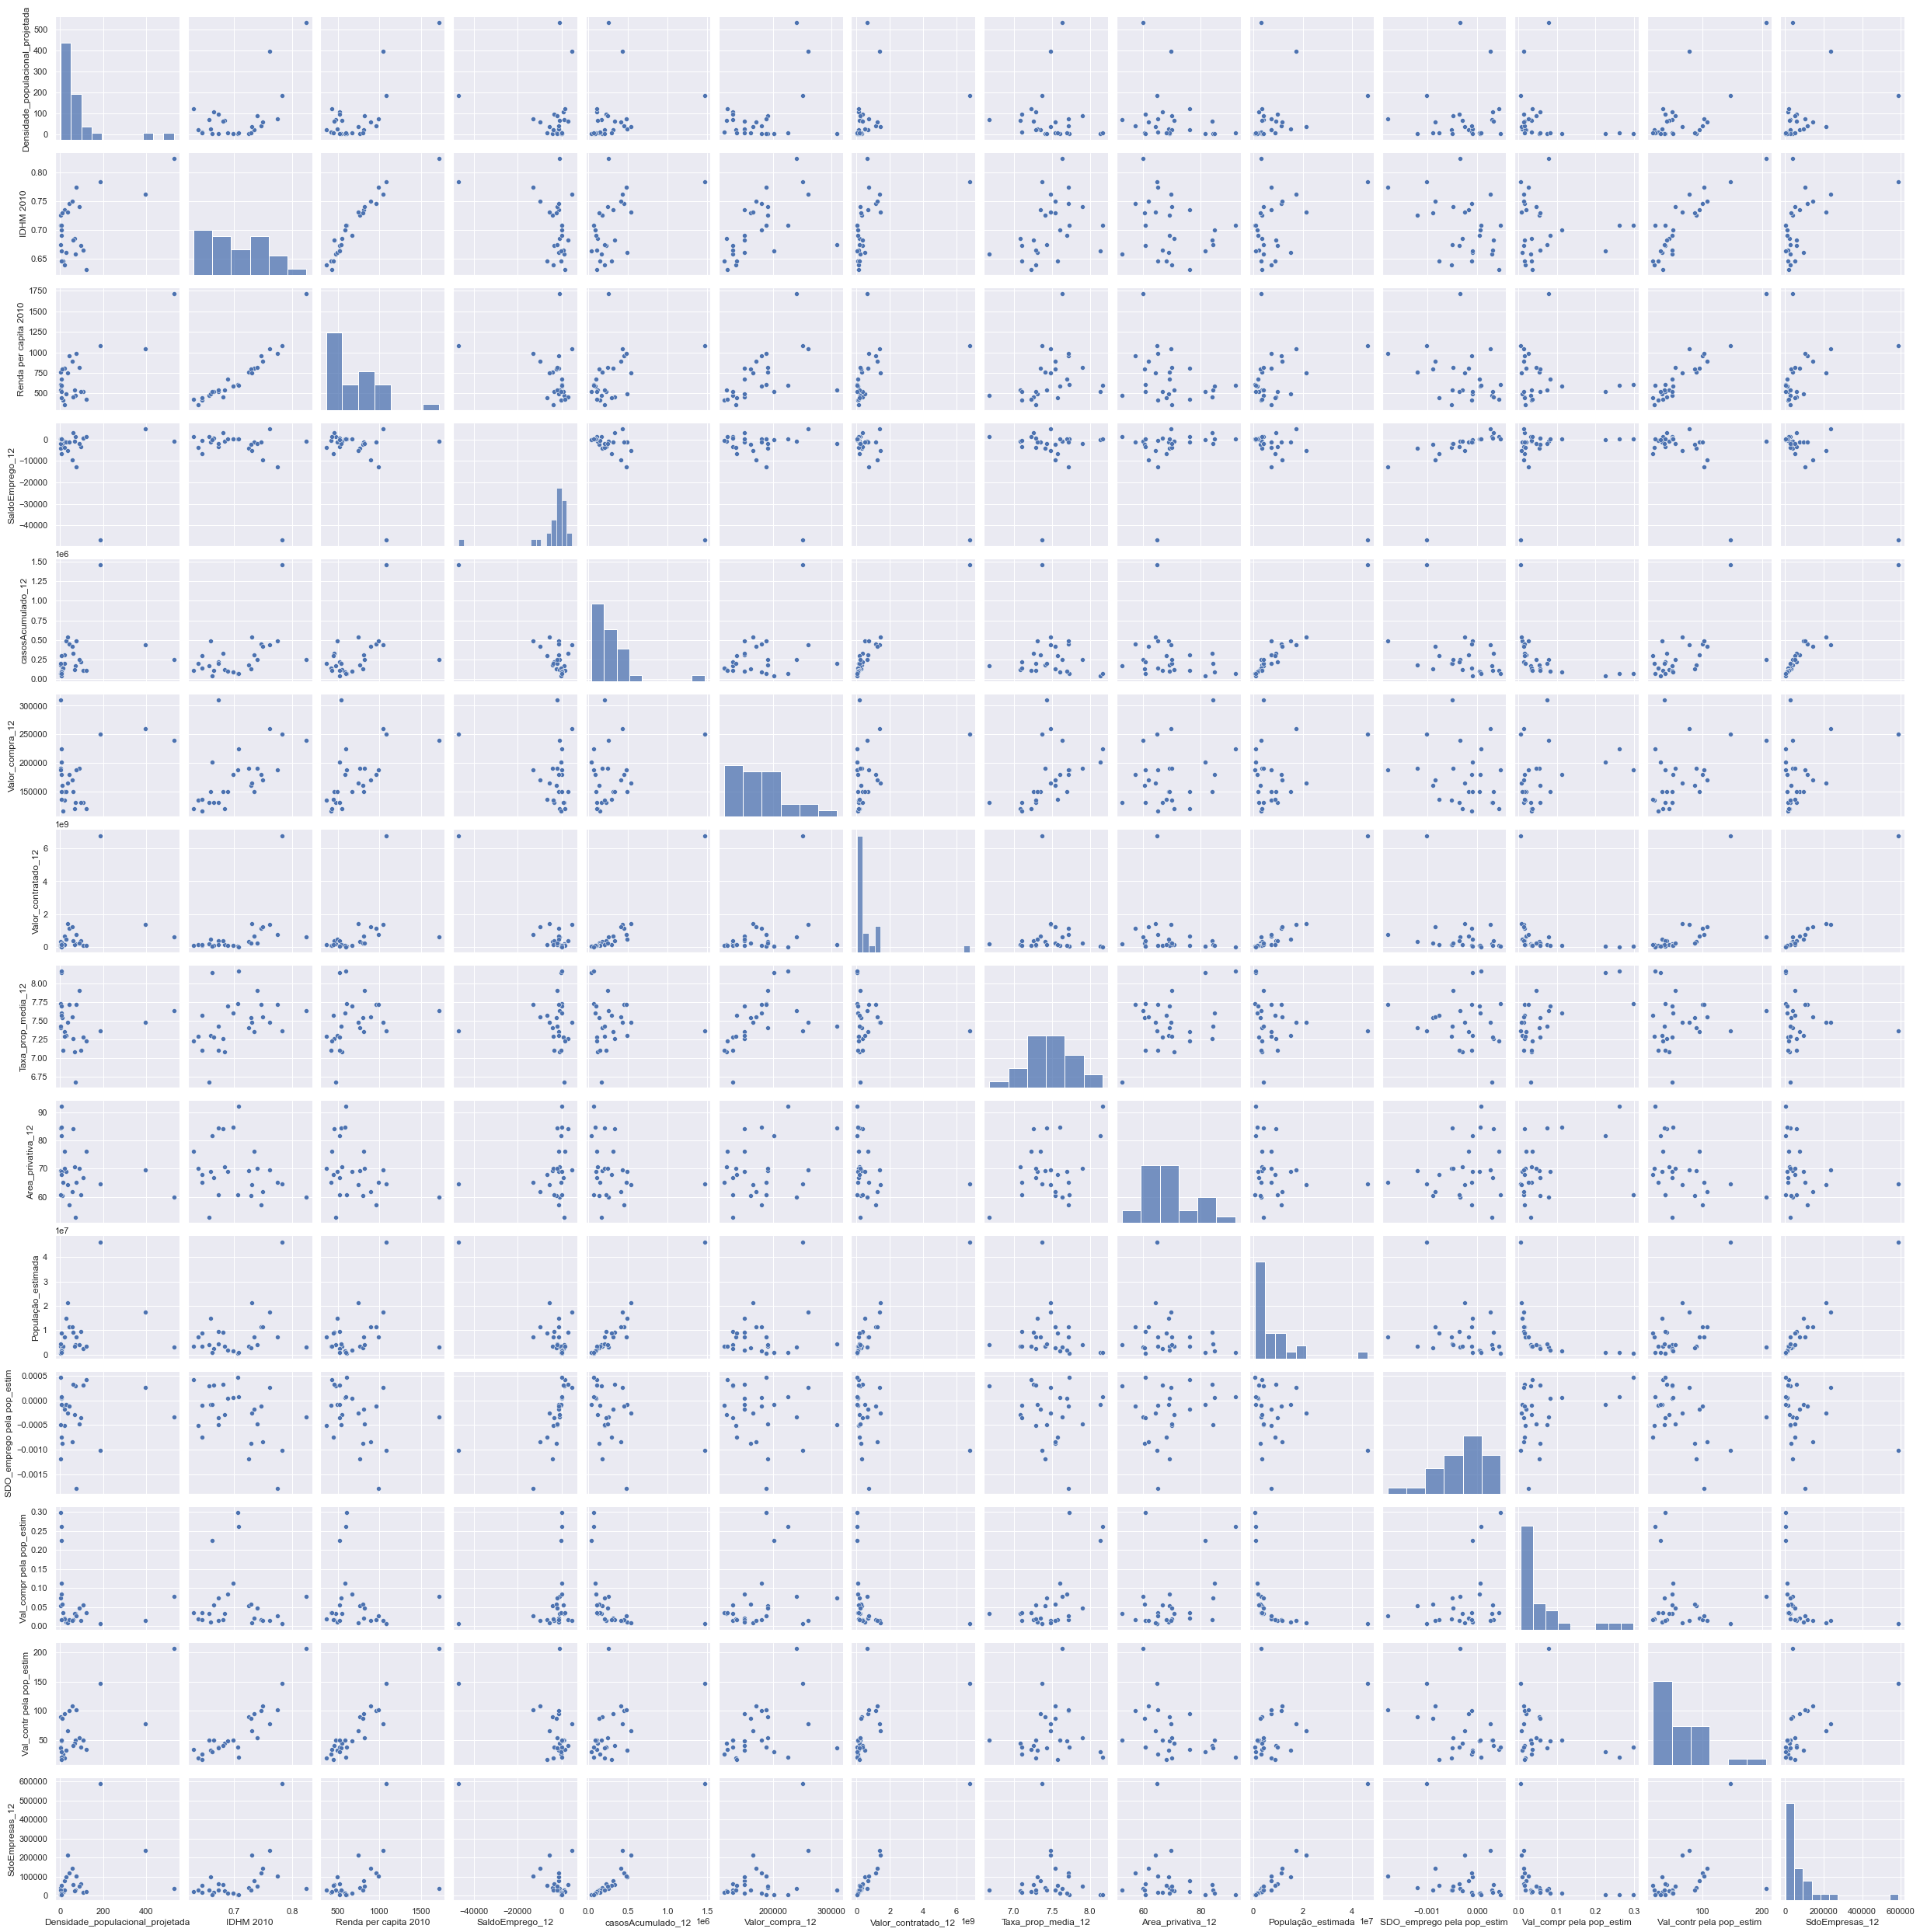

In [1277]:
sns.pairplot(df_dez.iloc[:,2:])

plt.show()

In [1192]:
df_var = pd.read_csv('dataset/novo/UF_mercado_imobiliario_var vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_var.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_var,casosAcumulado_12,Valor_compra_var,Valor_contratado_var,Taxa_prop_media_var,Area_privativa_var,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_var
CD_UF,,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,-2480.0,251701,-402.04,4.000893e+08,-0.401995,-1.39,3055149,-0.000812,-0.000132,130.955752,29921.0
52,GO,Goiás,20.907243,0.735,810.97,-9289.0,308868,-30000.00,3.685401e+08,-0.398489,-6.50,7113540,-0.001306,-0.004217,51.808258,60071.0
51,MT,Mato Grosso,3.904110,0.725,762.52,-13899.0,179427,15000.00,1.600231e+08,-0.343558,-0.78,3526220,-0.003942,0.004254,45.380904,30849.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,-4320.0,133761,-5000.00,1.237608e+08,-0.056017,-7.78,2809394,-0.001538,-0.001780,44.052476,23441.0
25,PB,Paraíba,71.533102,0.658,474.94,3712.0,166484,-28540.50,1.021812e+08,-0.730176,-8.35,4039277,0.000919,-0.007066,25.296902,21000.0


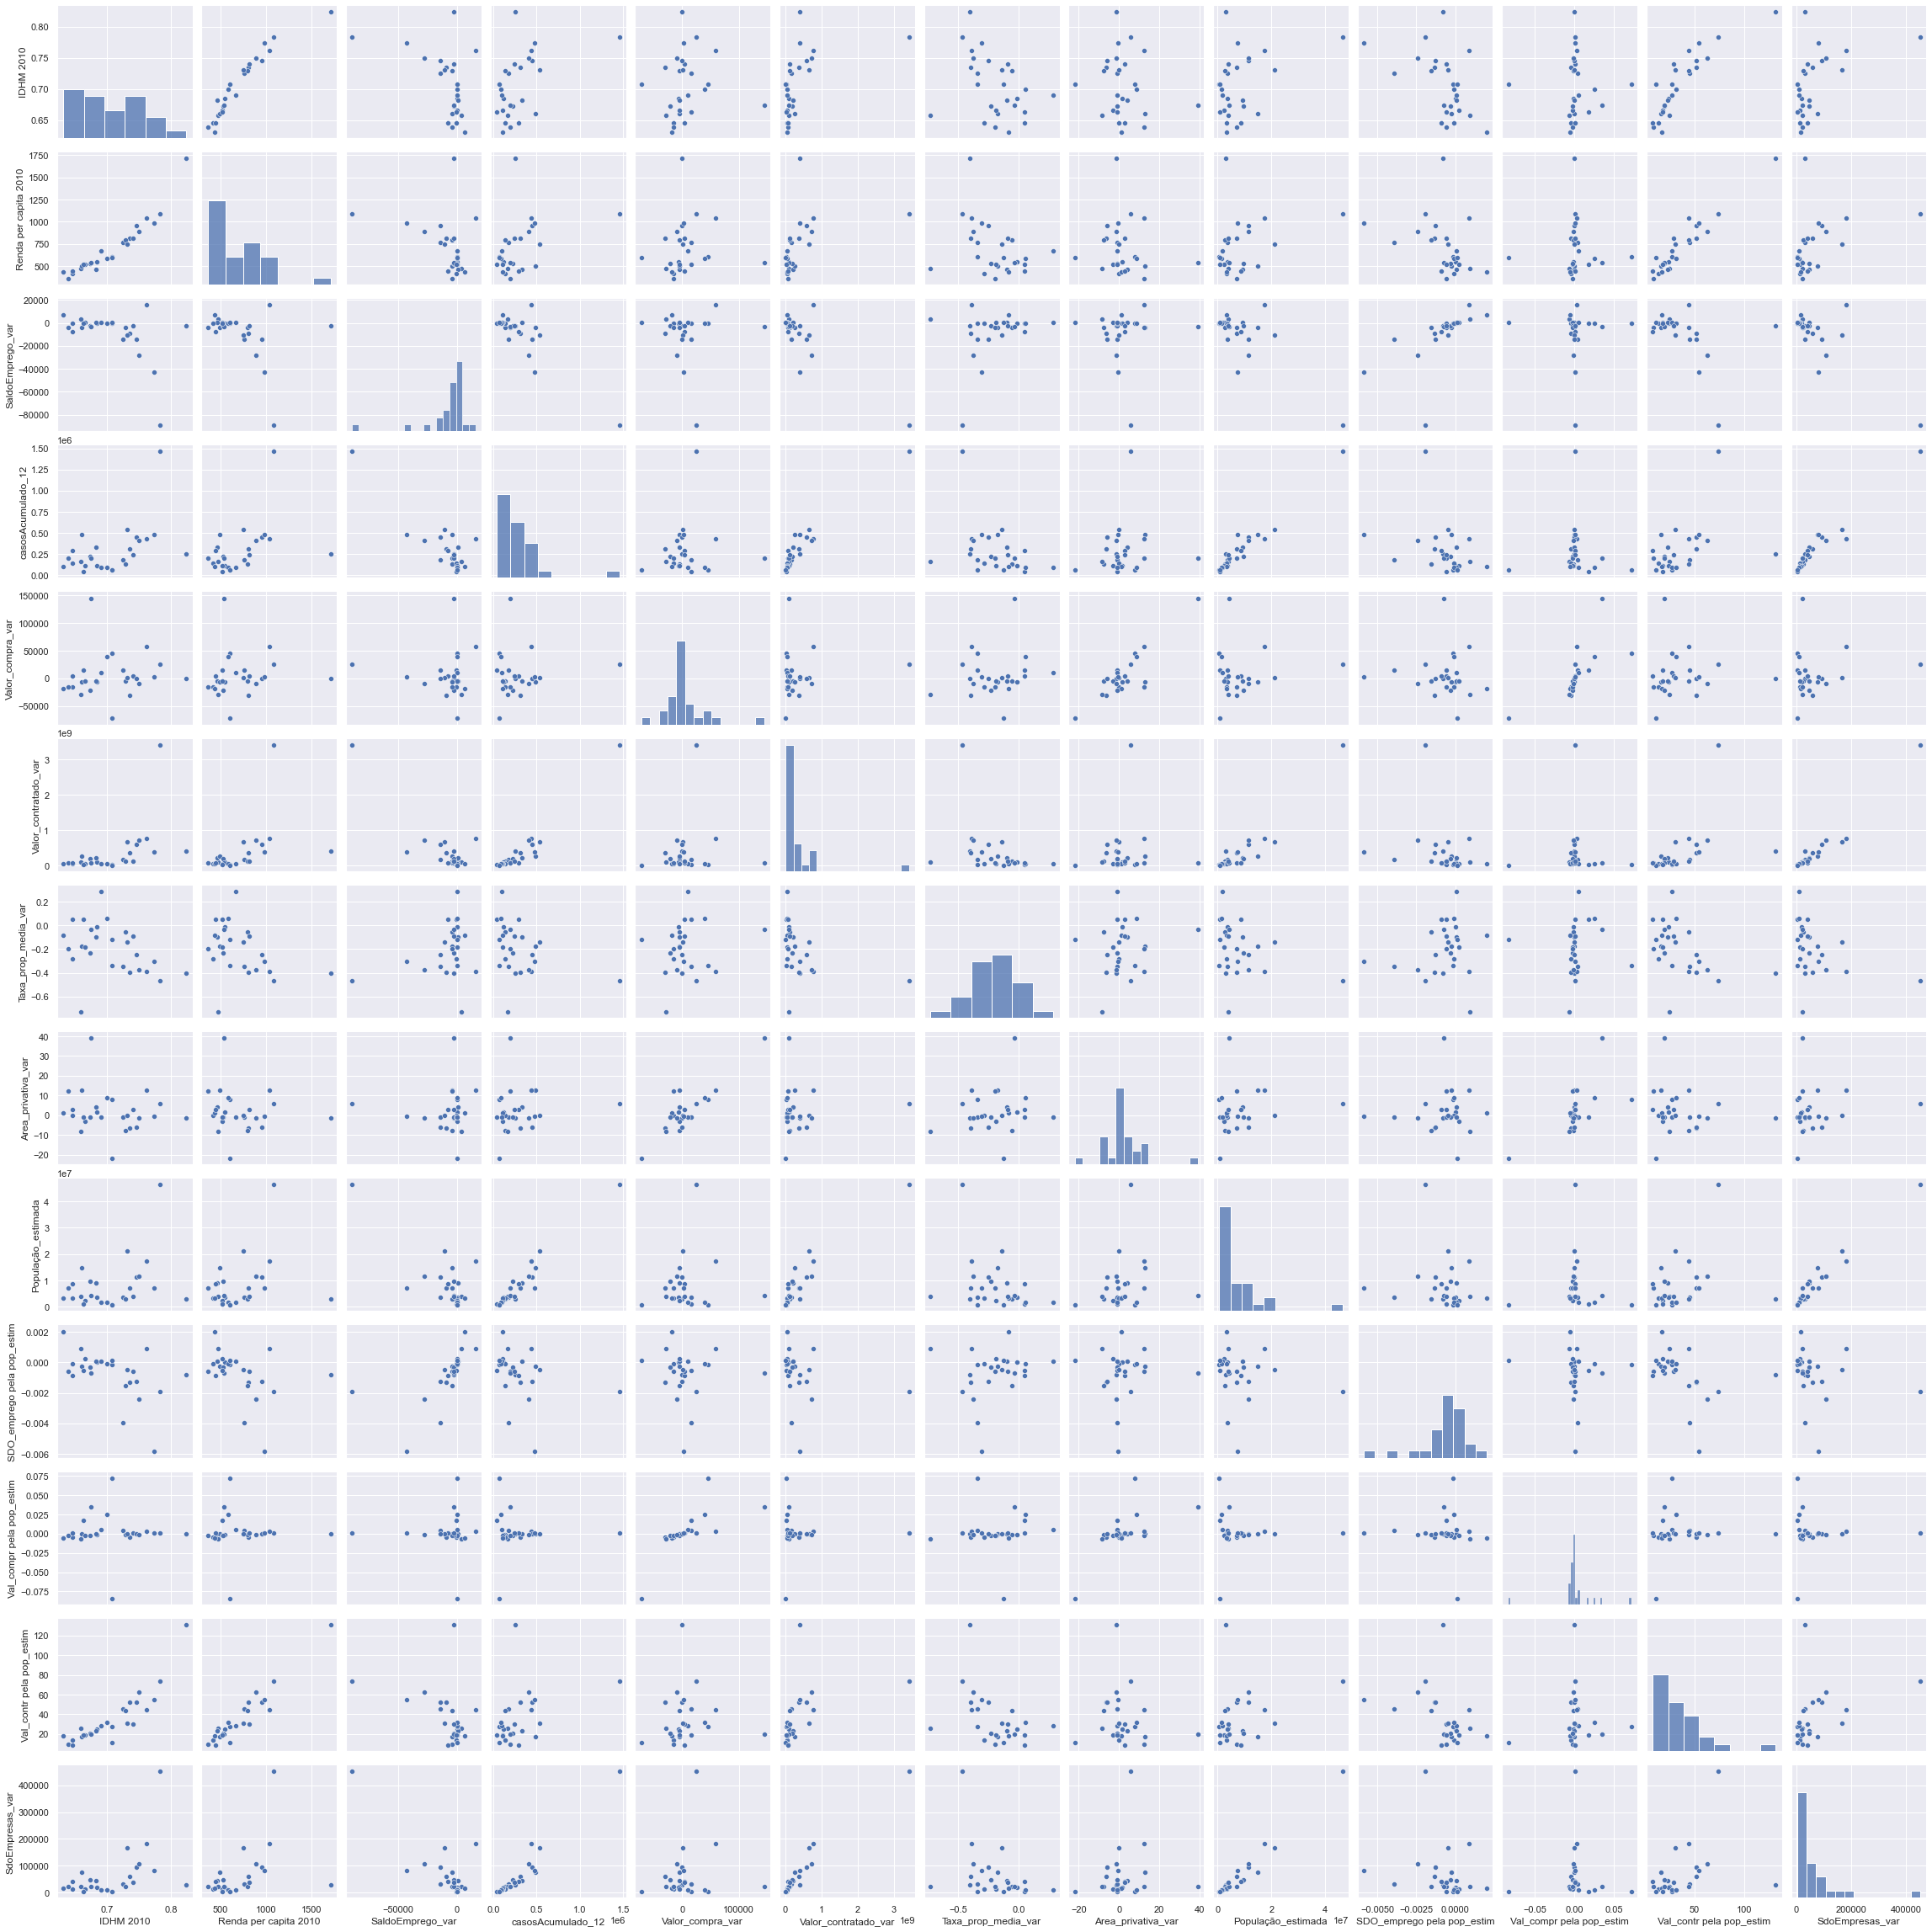

In [1278]:
sns.pairplot(df_var.iloc[:,3:])

plt.show()

In [1195]:
df = df_jan

df.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_compra_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_01
CD_UF,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,1457.0,240000.0,2.313967e+08,8.041858,61.24,3055149,0.000477,0.078556,75.739903,8728.0
52,GO,Goiás,20.907243,0.735,810.97,8081.0,180000.0,3.114260e+08,7.754394,82.62,7113540,0.001136,0.025304,43.779325,17600.0
51,MT,Mato Grosso,3.904110,0.725,762.52,9696.0,175000.0,1.565940e+08,7.755467,70.00,3526220,0.002750,0.049628,44.408469,8882.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,1854.0,165000.0,1.222186e+08,7.601646,68.32,2809394,0.000660,0.058732,43.503548,6765.0
25,PB,Paraíba,71.533102,0.658,474.94,-2527.0,158540.5,9.884272e+07,7.413085,61.00,4039277,-0.000626,0.039250,24.470400,6561.0


### Carregas Estados Espacial

In [1196]:
estados = gpd.read_file('BR_UF_2020/BR_UF_2020.shp')

estados.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


### Juntar Dados

In [1197]:
esp_df = pd.merge(
    left = estados,
    right = df,
    left_on = 'SIGLA_UF',
    right_on = 'UF',
    how = 'right'
)

print(esp_df.shape)
esp_df.head()

(27, 20)


,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_compra_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_01
0,53,Distrito Federal,DF,Centro-oeste,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...",DF,Distrito Federal,530.335628,0.824,1715.11,1457.0,240000.0,2.313967e+08,8.041858,61.24,3055149,0.000477,0.078556,75.739903,8728.0
1,52,Goiás,GO,Centro-oeste,"POLYGON ((-52.36102 -16.08160, -52.36040 -16.0...",GO,Goiás,20.907243,0.735,810.97,8081.0,180000.0,3.114260e+08,7.754394,82.62,7113540,0.001136,0.025304,43.779325,17600.0
2,51,Mato Grosso,MT,Centro-oeste,"POLYGON ((-61.54023 -10.00021, -61.54014 -9.99...",MT,Mato Grosso,3.904110,0.725,762.52,9696.0,175000.0,1.565940e+08,7.755467,70.00,3526220,0.002750,0.049628,44.408469,8882.0
3,50,Mato Grosso do Sul,MS,Centro-oeste,"POLYGON ((-57.83371 -20.93628, -57.83553 -20.9...",MS,Mato Grosso do Sul,7.866190,0.729,799.34,1854.0,165000.0,1.222186e+08,7.601646,68.32,2809394,0.000660,0.058732,43.503548,6765.0
4,25,Paraíba,PB,Nordeste,"MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ...",PB,Paraíba,71.533102,0.658,474.94,-2527.0,158540.5,9.884272e+07,7.413085,61.00,4039277,-0.000626,0.039250,24.470400,6561.0


In [ ]:
esp_df.to_file('Shapefiles/Estado-Jan')

### Selecionar dados para modelos

In [1285]:
target = 'Valor_compra_01'

x = df.iloc[:,2:].drop([target], axis = 1)

labels = x.columns

y = df[target]

x_y = pd.merge(x, y, left_index=True, right_index=True)

x.head()

,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_01
CD_UF,,,,,,,,,,,,
53,530.335628,0.824,1715.11,1457.0,2.313967e+08,8.041858,61.24,3055149,0.000477,0.078556,75.739903,8728.0
52,20.907243,0.735,810.97,8081.0,3.114260e+08,7.754394,82.62,7113540,0.001136,0.025304,43.779325,17600.0
51,3.904110,0.725,762.52,9696.0,1.565940e+08,7.755467,70.00,3526220,0.002750,0.049628,44.408469,8882.0
50,7.866190,0.729,799.34,1854.0,1.222186e+08,7.601646,68.32,2809394,0.000660,0.058732,43.503548,6765.0
25,71.533102,0.658,474.94,-2527.0,9.884272e+07,7.413085,61.00,4039277,-0.000626,0.039250,24.470400,6561.0


### Correlações

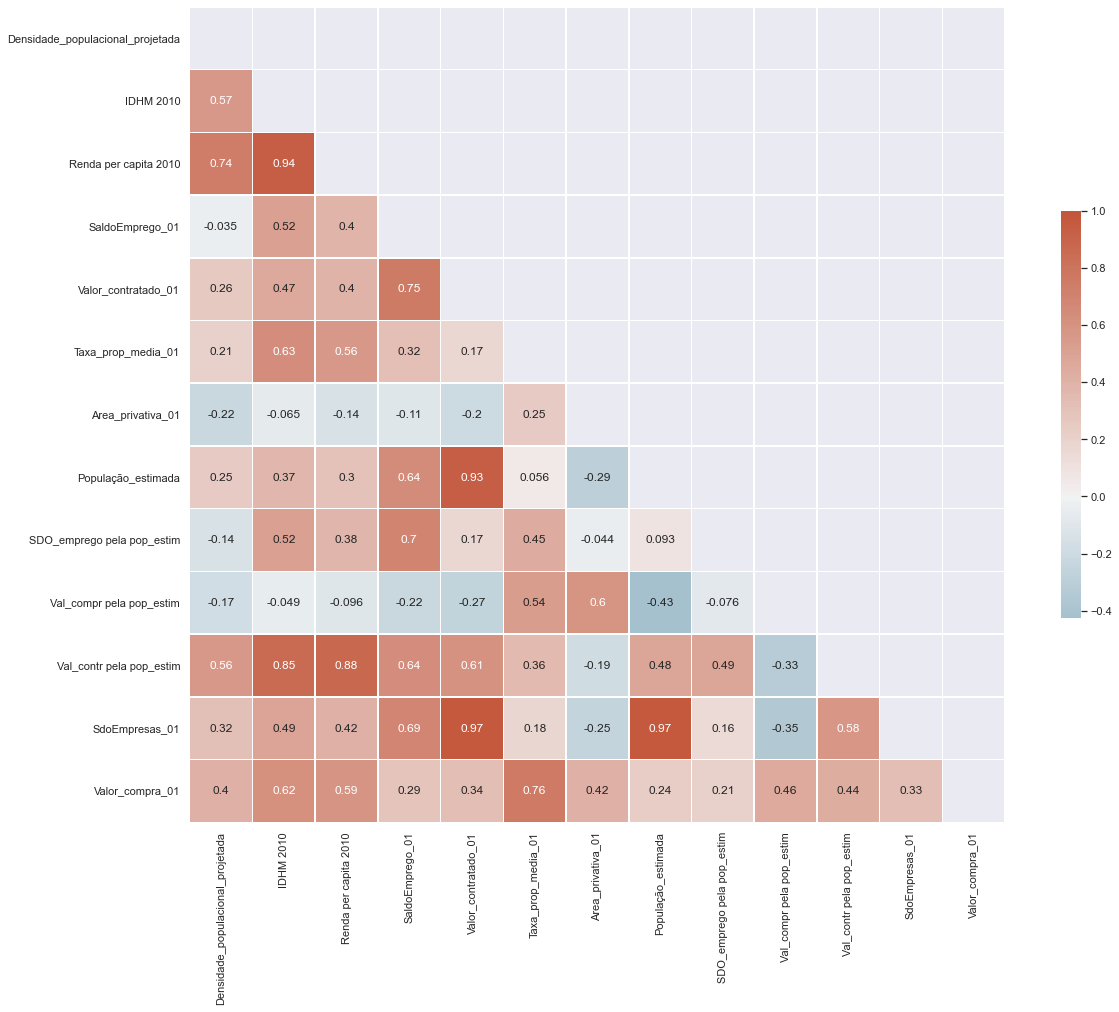

In [1286]:
scripts.corr(x_y, figsize = (20,15))

### PPS index

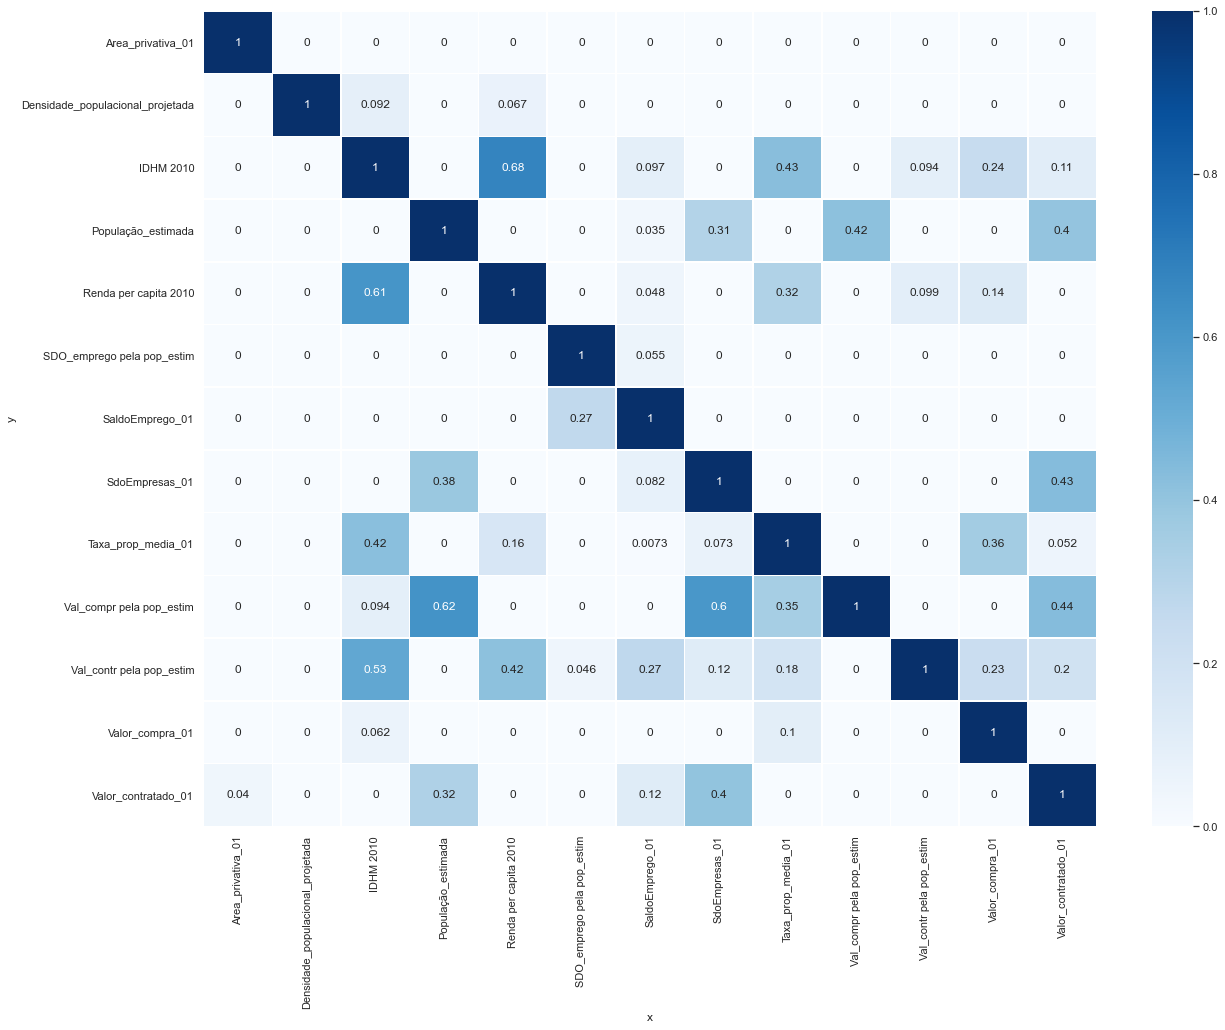

In [1287]:
plt.figure(figsize=(20, 15))

matrix_df = pps.matrix(x_y)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

### Remoção de Variáveis com alta correlação

In [1288]:
x = x[variables_sel]

labels = x.columns

x_y = pd.merge(x, y, left_index=True, right_index=True)


x.head()

,Densidade_populacional_projetada,Taxa_prop_media_01,Area_privativa_01,População_estimada
CD_UF,,,,
53,530.335628,8.041858,61.24,3055149
52,20.907243,7.754394,82.62,7113540
51,3.904110,7.755467,70.00,3526220
50,7.866190,7.601646,68.32,2809394
25,71.533102,7.413085,61.00,4039277


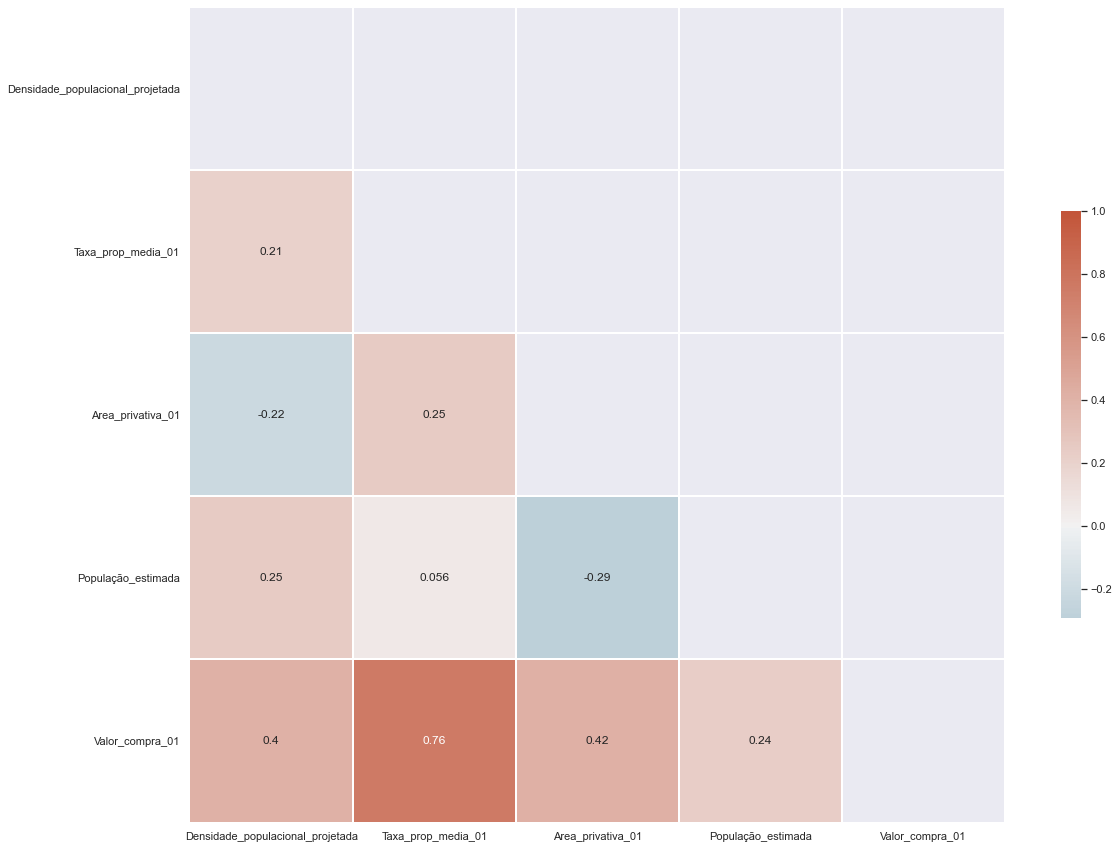

In [1289]:
scripts.corr(x_y, figsize = (20,15))

#### VIF

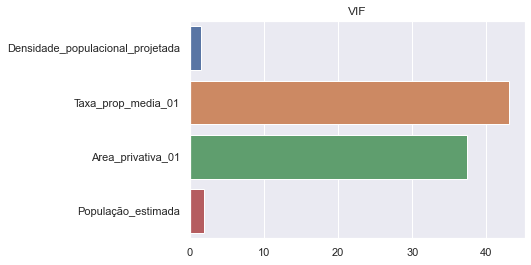

In [1298]:
scripts.plot_vif(x)

#### Skewness e Kurtosis

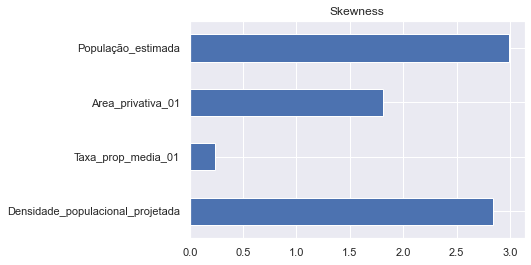

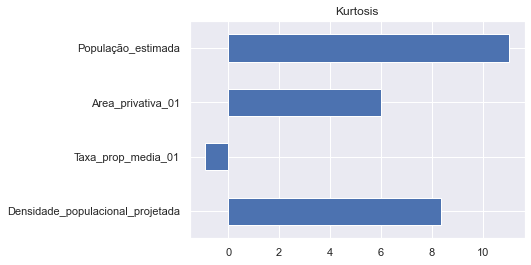

In [1299]:
scripts.plot_skew_kurtosis(x)

### Realizar Normalização

In [1300]:
x_norm = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns, index = x.index)

x_y_norm = pd.DataFrame(StandardScaler().fit_transform(x_y), columns = x_y.columns, index = x_y.index)

### Regressão Linear

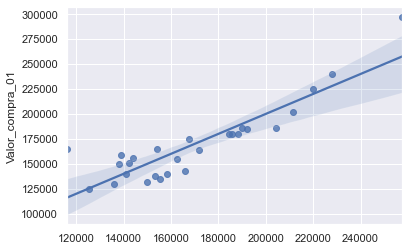

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Valor_compra_01   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     21.25
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.70e-07
Time:                        22:55:32   Log-Likelihood:                -301.17
No. Observations:                  27   AIC:                             612.3
Df Residuals:                      22   BIC:                             618.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.697e+05   3604.705     47.069      0.000    1.62e+05    1.77e+05
Densidade_populacional_projetada  1.163e+04   3899.887      2.983      0.007    3545.827    1.97e+04
Taxa_prop_media_01                2.144e+04   3890.453      5.510      0.000    1.34e+04    2.95e+04
Area_privativa_01                 1.552e+04   4026.949      3.855      0.001    7171.893    2.39e+04
População_estimada                9262.8017   3861.113      2.399      0.025    1255.343    1.73e+04
==============================================================================
Omnibus:                        9.259   Durbin-Watson:                   2.893
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                7.420
Skew:                           1.131   Prob(JB):                       0.0245
Kurtosis:                       4.217   Cond. No.                         1.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1301]:
lm = sm.OLS(endog = y, exog = add_constant(x_norm))

r = lm.fit()

sns.regplot(x = r.predict(add_constant(x_norm)), y = y)

plt.show()

r.summary()

#### Cross Validation

Results
MSE: 741219261.816
RMSE: 27225.342
MAE: 18549.855
R2: 0.467


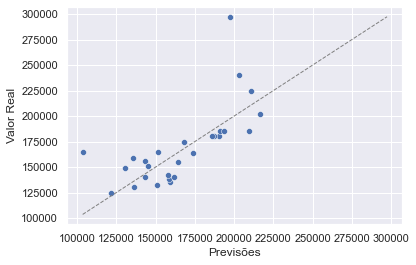

In [1302]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, LinearRegression(), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

### PCA

In [1303]:
pca = PCA(n_components = 2)

pca_coord = pca.fit_transform(x_y_norm)

### KMeans

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

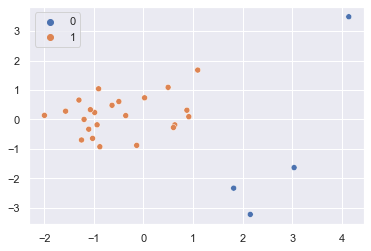

In [1304]:
kmeans = KMeans(n_clusters = 2).fit_transform(x_y_norm)

sns.scatterplot(pca_coord[:,0], pca_coord[:,1], hue = kmeans.argmax(axis = 1), )

In [1305]:
pd.DataFrame({'Cidade': df['UF'], 'Cluster': kmeans.argmax(axis = 1)}).sort_values(by = 'Cluster')

,Cidade,Cluster
CD_UF,,
53,DF,0
33,RJ,0
35,SP,0
16,AP,0
43,RS,1
31,MG,1
32,ES,1
15,PA,1
17,TO,1


##### Outlier

In [1306]:
df[pca_coord[:,0] > 5]

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_compra_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_01
CD_UF,,,,,,,,,,,,,,,


Removendo Outliers

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


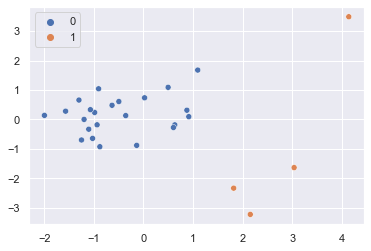

,Cidade,Cluster
CD_UF,,
14,RR,0
43,RS,0
31,MG,0
32,ES,0
15,PA,0
17,TO,0
11,RO,0
12,AC,0
13,AM,0


In [1307]:
slicer = pca_coord[:,0] < 5

pca = PCA(n_components = 2)

pca_coord_new = pca.fit_transform(x_y_norm.values[slicer])

kmeans_new = KMeans(n_clusters = 2).fit_transform(x_y_norm.values[slicer])

sns.scatterplot(pca_coord_new[:,0], pca_coord_new[:,1], hue = kmeans_new.argmax(axis = 1), )

plt.show()

pd.DataFrame({'Cidade': df['UF'][slicer], 'Cluster': kmeans_new.argmax(axis = 1)}).sort_values(by = 'Cluster')

### Cluster Dendograma

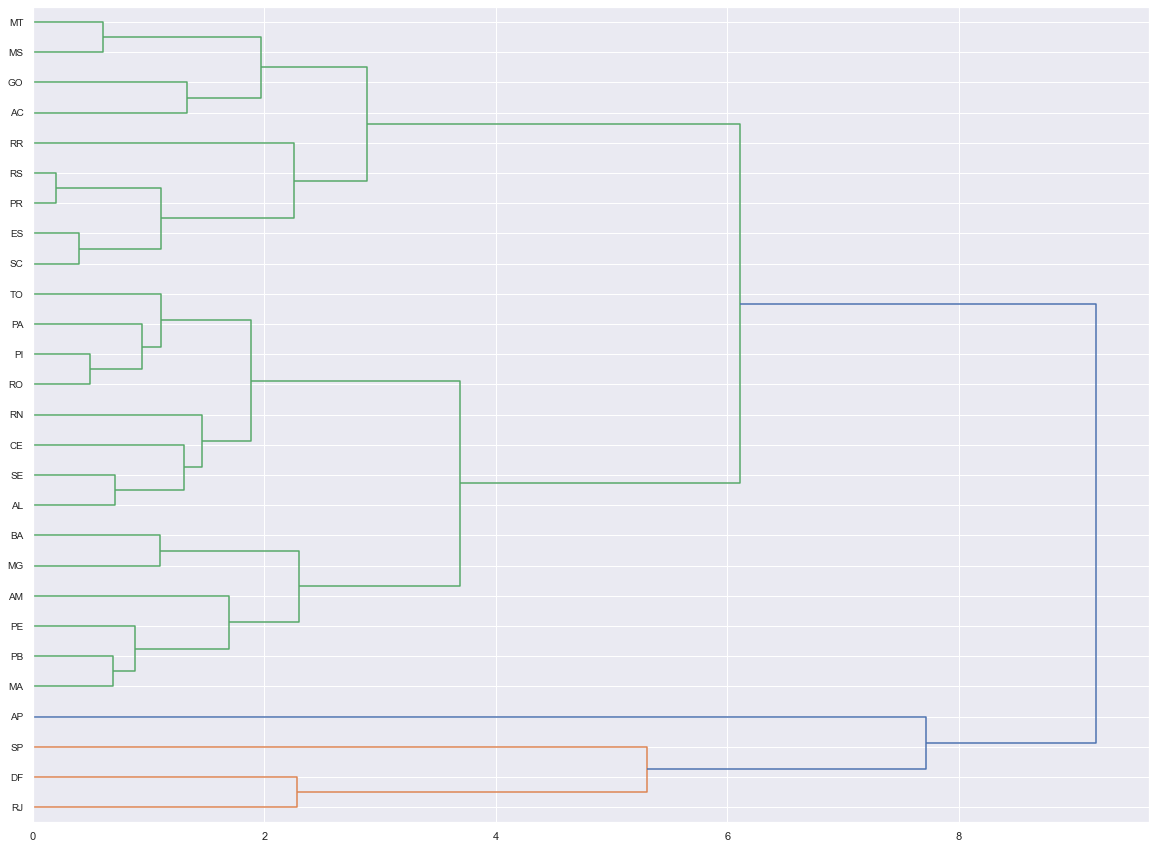

In [1308]:
linked = linkage(x_y_norm.values, 'ward')

plt.figure(figsize=(20, 15))
dendrogram(
            linked,
            orientation='right',
            labels=df['UF'].values,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

### Regressão Espacial

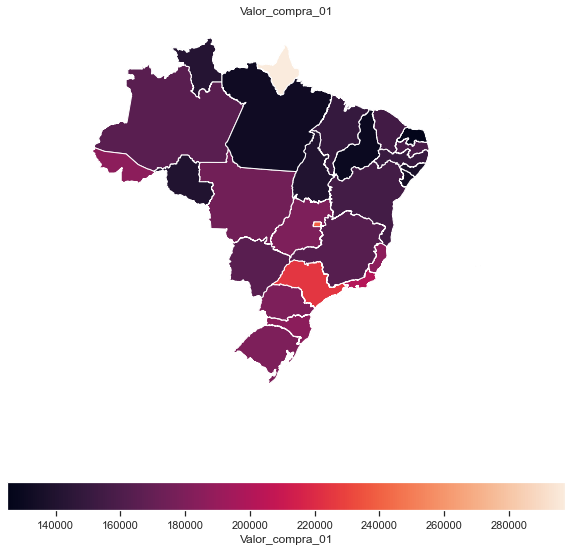

In [1309]:
ax = esp_df.plot(
    column = target,
    figsize = (10,10),
    legend = True,
    legend_kwds = {'label': target, 'orientation': "horizontal"},
)

ax.set_title(target)

ax.set_axis_off()

#### Pesos

In [1310]:
w = libpysal.weights.Rook.from_dataframe(esp_df, )

# w = libpysal.weights.Queen.from_dataframe(esp_df, )

w.transform = 'r'

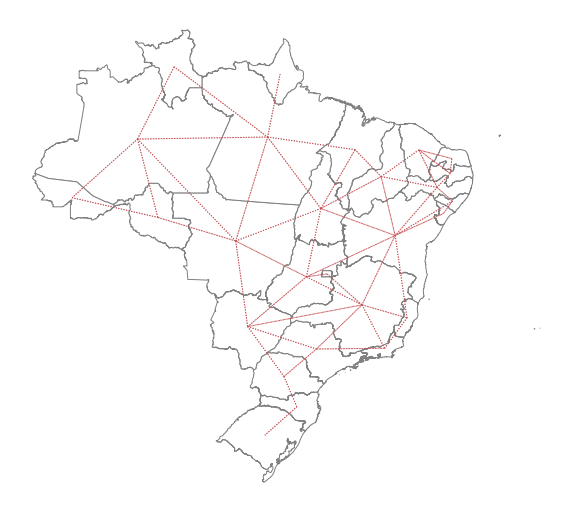

In [1311]:
warnings.filterwarnings('ignore', module = 'libpysal')

ax = esp_df.plot(edgecolor='grey', facecolor='w',figsize=(10,10) )

f, ax = w.plot(esp_df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''),
              )

ax.set_axis_off()

In [1312]:
moran_I = {}
moran = {}
moran_local = {}

for i in x_y_norm.columns:
    
    moran[i] = esda.Moran(x_y_norm[i].values, w)
    moran_local[i] = esda.moran.Moran_Local(x_y_norm[i].values, w)
    moran_I[i] = moran[i].I

In [1313]:
(pd.Series(moran_I)
     .rename('Moran I')
     .sort_values(ascending = False)
     .to_frame()
)

,Moran I
Taxa_prop_media_01,0.288538
População_estimada,0.192211
Densidade_populacional_projetada,0.089615
Valor_compra_01,0.056461
Area_privativa_01,-0.044486


Taxa_prop_media_01


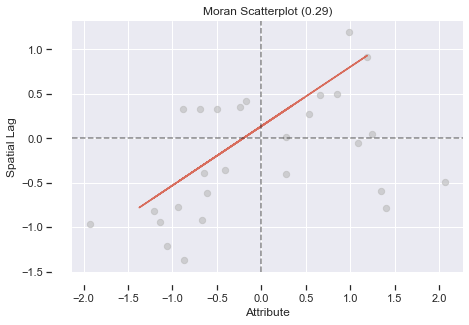

População_estimada


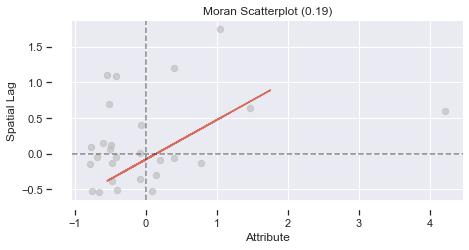

Densidade_populacional_projetada


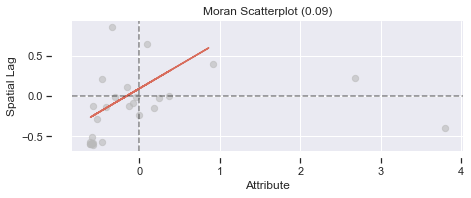

Valor_compra_01


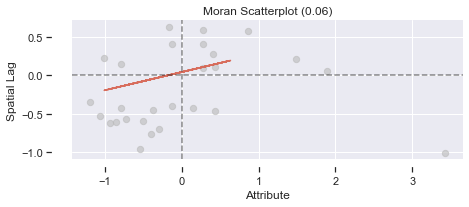

In [1314]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])
    moran_scatterplot(moran[i[0]], aspect_equal=True)
    plt.show()

Taxa_prop_media_01


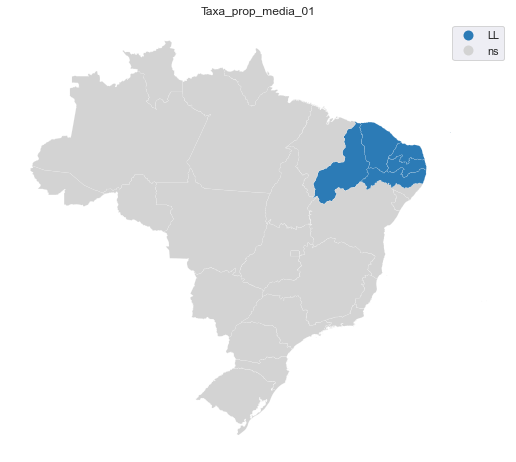

População_estimada


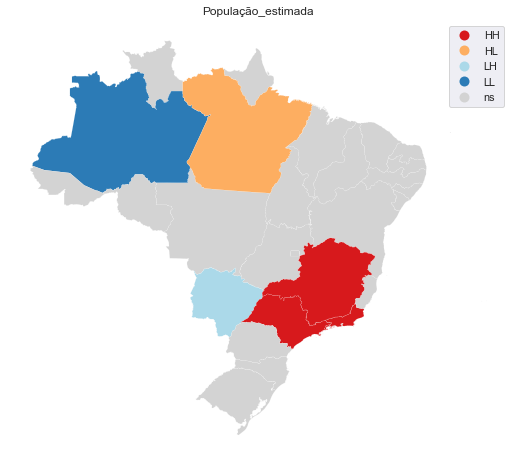

Densidade_populacional_projetada


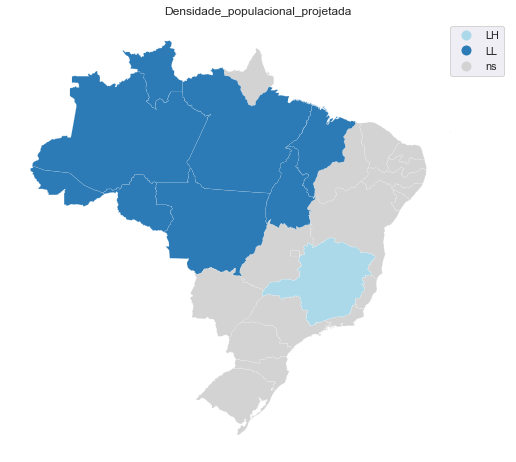

Valor_compra_01


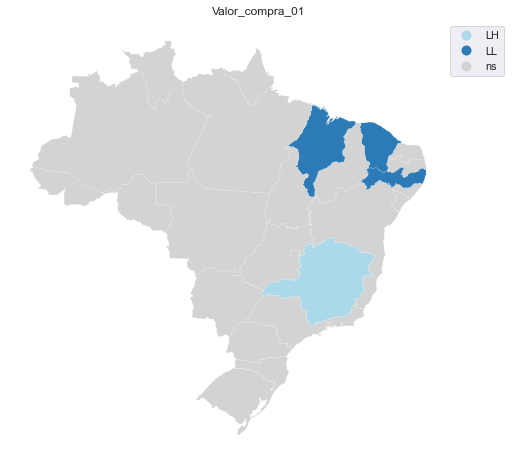

In [1315]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])

    fig, ax = lisa_cluster(moran_local[i[0]], esp_df, p=0.05, figsize = (9,9))
    ax.set_title(i[0])
    plt.show()

In [1316]:
r = spreg.OLS(
        x = x_norm.values, name_x = list(labels),
        y = y.values, 
        w = w,
    )

print(r.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          27
Mean dependent var  : 169671.4967                Number of Variables   :           5
S.D. dependent var  :  37998.1043                Degrees of Freedom    :          22
R-squared           :      0.7944
Adjusted R-squared  :      0.7570
Sum squared residual:7718375851.234                F-statistic           :     21.2506
Sigma-square        :350835265.965                Prob(F-statistic)     :   2.703e-07
S.E. of regression  :   18730.597                Log likelihood        :    -301.170
Sigma-square ML     :285865772.268                Akaike info criterion :     612.341
S.E of regression ML:  16907.5655                Schwarz criterion     :     618.820

-------------------------------------------------------------------------

<AxesSubplot:ylabel='Valor_compra_01'>

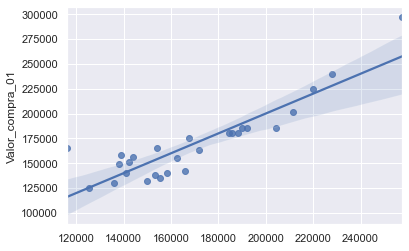

In [1317]:
sns.regplot(x = r.predy, y = y)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       preco                Number of Observations:          27
Mean dependent var  : 169671.4967                Number of Variables   :           6
S.D. dependent var  :  37998.1043                Degrees of Freedom    :          21
Pseudo R-squared    :      0.8068
Spatial Pseudo R-squared:  0.7862

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    193679.9480651    38060.1589311       5.0887845       0.0000004
Densidade_populacional_projetada    11846.1202206    3429.0666165       3.4546194       0.0005511
  Taxa_prop_media_01    22248.9460108    36

<AxesSubplot:ylabel='Valor_compra_01'>

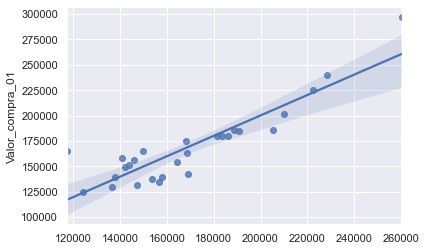

In [1318]:
spatial_regression = spreg.GM_Lag(
        x = x_norm.values, name_x = list(labels),
        y = y.values, name_y = 'preco',
        w = w,
    
        
    )

print(
    spatial_regression.summary
)

sns.regplot(x = spatial_regression.predy, y = y)

### Random Forests

In [1319]:
rf = RandomForestRegressor(n_estimators = 200)

rf.fit(y = y, X = x_norm)

RandomForestRegressor(n_estimators=200)

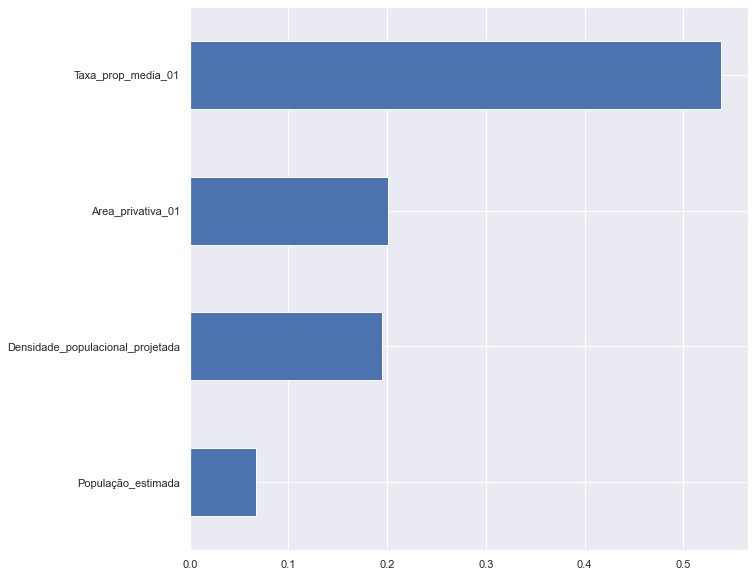

In [1320]:
pd.Series(rf.feature_importances_, index = labels).sort_values().plot.barh(figsize = (10,10))

plt.show()

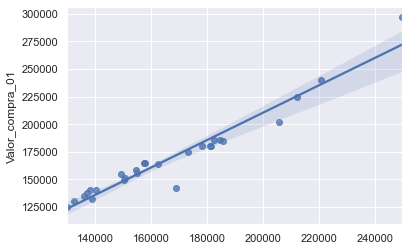

In [1321]:
sns.regplot(x = rf.predict(x_norm), y = y)

plt.show()

Results
MSE: 1071169412.439
RMSE: 32728.725
MAE: 18420.160
R2: 0.230


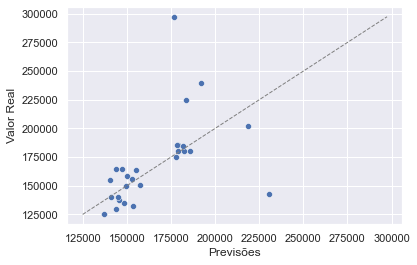

In [1322]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, RandomForestRegressor(n_estimators = 50), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

#### Recursive Feature Eliminations

In [1263]:
selector_rf = RFE(rf, n_features_to_select=.5, step=1)

selector_rf = selector_rf.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_rf.ranking_, index = labels).sort_values()

Best Features


IDHM 2010                           1
Taxa_prop_media_01                  1
Area_privativa_01                   1
Val_compr pela pop_estim            1
População_estimada                  2
Valor_contratado_01                 3
Densidade_populacional_projetada    4
SDO_emprego pela pop_estim          5
SaldoEmprego_01                     6
dtype: int64

### Linear Support Vector Regression

In [1323]:
svr = SVR(kernel = 'linear')

svr = svr.fit(y = y, X = x_norm)

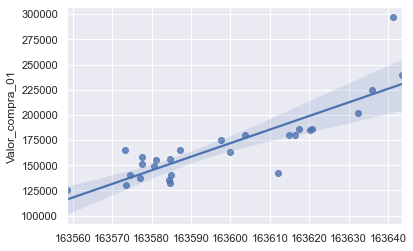

In [1324]:
sns.regplot(x = svr.predict(x_norm), y = y)

plt.show()

Results
MSE: 1578243548.736
RMSE: 39727.114
MAE: 28748.206
R2: -0.135


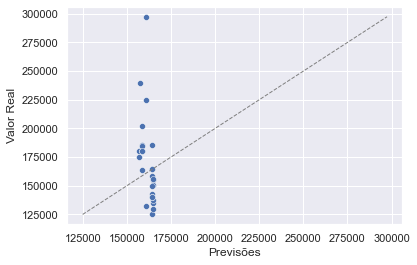

In [1325]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, svr, folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

In [1267]:
selector_svr = RFE(SVR(kernel='linear'), n_features_to_select=.5, step=1)

selector_svr = selector_svr.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_svr.ranking_, index = labels).sort_values()

Best Features


IDHM 2010                           1
SaldoEmprego_01                     1
Taxa_prop_media_01                  1
SDO_emprego pela pop_estim          1
Valor_contratado_01                 2
Densidade_populacional_projetada    3
População_estimada                  4
Val_compr pela pop_estim            5
Area_privativa_01                   6
dtype: int64

In [1268]:
pd.DataFrame(
    {
    'RF Feature Importance': np.argsort(-rf.feature_importances_),
    'RF RFE': selector_rf.ranking_,
    'SVR RFE': selector_svr.ranking_
},
    index = labels
)

,RF Feature Importance,RF RFE,SVR RFE
Densidade_populacional_projetada,4,4,3
IDHM 2010,1,1,1
SaldoEmprego_01,8,6,1
Valor_contratado_01,5,3,2
Taxa_prop_media_01,0,1,1
Area_privativa_01,7,1,6
População_estimada,6,2,4
SDO_emprego pela pop_estim,3,5,1
Val_compr pela pop_estim,2,1,5
